In [17]:
import tensorflow as tf
import os
import pandas as pd
import strym
from strym import strymread
import matplotlib.pyplot as plt
from pylab import rcParams
import strym.DBC_Read_Tools as dbc
import numpy as np
from strym import strymmap
import keras
from keras import layers, Model

In [4]:
data_path = '../2020-12-02-00-00-49_5FNYF6H05HB089022_CAN_Messages.csv'
dbcfile = '../data/honda_pilot_2017.dbc'

In [5]:
r =strymread(csvfile=data_path)

[2021_06_29_09_10_33] (root) INFO: Vehicle model infered is honda-pilot-2017


In [6]:
r.speed().describe()

,Time,Message
count,1.876750e+05,187675.000000
mean,1.606868e+09,27.581803
std,5.162042e+02,31.687866
min,1.606867e+09,0.000000
25%,1.606868e+09,0.000000
50%,1.606868e+09,5.810000
75%,1.606869e+09,64.370000
max,1.606869e+09,82.810000


array([[<AxesSubplot:title={'center':'Time'}>,
        <AxesSubplot:title={'center':'Message'}>]], dtype=object)

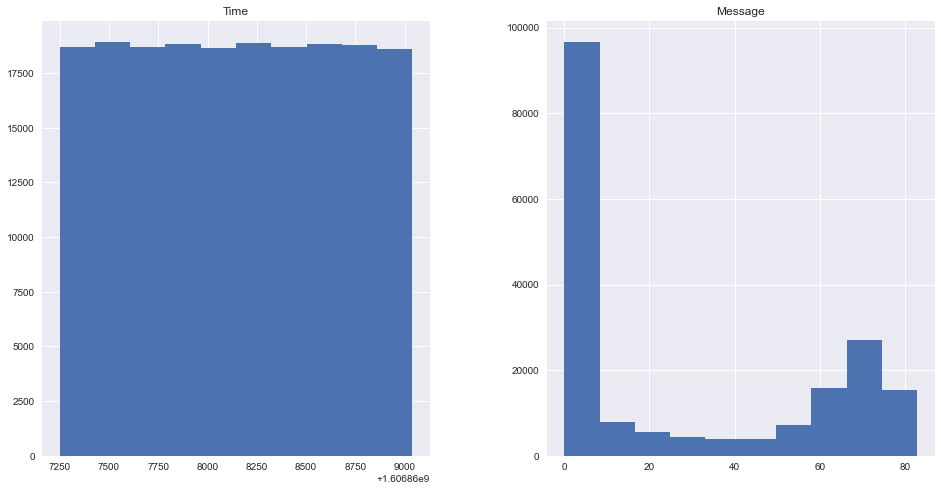

In [7]:
r.speed().hist()

In [14]:
debug_num_samples = 100
r_dataframe = r.dataframe[:debug_num_samples]

# index = [0, 1, 2, 3, 4, 5... num_train_samples - 1]
features = ['Time', 'Bus', 'MessageID', 'Message', 'MessageLength']
labels = ['Time', 'Latitude', 'Longitude']
can_data_df = r_dataframe[features][:]
labels_df = r_dataframe[labels][:]

In [15]:
can_data = can_data_df.to_numpy()
labels = labels_df.to_numpy()

In [105]:
signalLength = 5
curLabel = 0
stackedData, stackedLabels = np.array([]), np.array([])
curData = np.chararray((debug_num_samples-signalLength, signalLength, len(features)))
curLabels = np.chararray((debug_num_samples-signalLength, signalLength, len(labels)))
#split signal into subsampled sequences
for i in range(debug_num_samples-signalLength):
    curData[i, :] = can_data_df[i:i+signalLength]
    #stack the data
    stackedData = np.concatenate((stackedData, curData), axis=0) if stackedData.size > 0 else curData  
    stackedLabels = np.concatenate((stackedLabels, curLabels), axis=0) if stackedLabels.size > 0 else curLabels
    
    curLabel+=1